# Metapopulation models
```{contents} Table of Contents
:depth: 3
```

## Canonical example 

The canonical example (worth studying in detail) of a **metapopulation** starts with the traditional SIR model and considers splitting this population into two sets: set one denoted with a subscript 1 and subscript 2. 
We will take the three disease states from our traditional SIR model and now assign individuals to $S_{1}$ and $S_{2}$; $I_{1}$ and $I_{2}$; and $R_{1}$ and $R_{2}$.
An individual from population "1" in the infected disease state is assigned to the compartment $I_{1}$ and so on. 

The partition into two populations is meant to be vague because this partition could represent many different scenarios. There may be a physical barrier between the two populations that makes commuting between populations possible but difficult. 
Another example could be two age groups in the same location that have minimal contact with one another or are two population in which you expect that the dynamics within these groups is different than between these groups. 

First we will present the canonical "two-population" metapopulation model and then discuss the assumptions in this model. 

\begin{align}
    \frac{dS_{1}}{dt} &= -S_{1} \left[ \beta_{1} \left( \frac{I_{1}}{N_{1}} + \rho \frac{I_{2}}{N_{1}} \right) \right]  \\ 
    \frac{dI_{1}}{dt} &=  S_{1} \left[ \beta_{1} \left( \frac{I_{1}}{N_{1}} + \rho \frac{I_{2}}{N_{1}} \right) \right]  - \gamma I_{1} \\ 
    \frac{dR_{1}}{dt} &= \gamma I_{1} \\ 
\\
    \frac{dS_{2}}{dt} &= - S_{2} \left[ \beta_{1} \left( \frac{I_{2}}{N_{2}} + \rho \frac{I_{1}}{N_{2}} \right) \right]  \\ 
    \frac{dI_{2}}{dt} &=  S_{2} \left[ \beta_{1} \left( \frac{I_{2}}{N_{2}} + \rho \frac{I_{1}}{N_{2}} \right) \right] - \gamma I_{2} \\ 
    \frac{dR_{2}}{dt} &= \gamma I_{2} \\ 
\end{align}

This metapopulation model looks similar to the one-population model, except with a more complicated force of infection. 

The force of infections for the one-population and two-population SIR model are 

\begin{align}
    \lambda_{\text{one pop}} &= \beta \frac{I}{N}; \;
    \lambda_{\text{two pop}} = \beta \left( \frac{I_{1}}{N_{1}} + \rho  \frac{I_{2}}{N_{1}} \right) \\ 
\end{align}

The force of infection for the two-population has an additional $( \beta \rho I_{2}/N_{1} )$ term for the individuals assigned to "population one" 
Note that the denominator of this extra transmission term is $N_{1}$---the individuals who are in population one. 
This assumes that transmission occurs when an individual in population two commutes to population one and then contacts a susceptible in population one. In other words, transmission occurs in population one. 
The parameter $\rho$ reflects the amount of interaction, often called the amount of "coupling" between the two populations. The range for this parameter is typically between zero (no interaction) up to one (full interaction). 

Lets look, mathematically at the extreme case of $\rho=0$
When $\rho=0$ our model reduces to 

\begin{align}
    \frac{dS_{1}}{dt} &= -S_{1} \left[ \beta_{1} \left( \frac{I_{1}}{N_{1}} \right) \right]  \\ 
    \frac{dI_{1}}{dt} &=  S_{1} \left[ \beta_{1} \left( \frac{I_{1}}{N_{1}}  \right) \right]  - \gamma I_{1} \\ 
    \frac{dR_{1}}{dt} &= \gamma I_{1} \\ 
\\
    \frac{dS_{2}}{dt} &= - S_{2} \left[ \beta_{1} \left( \frac{I_{2}}{N_{2}} \right) \right]  \\ 
    \frac{dI_{2}}{dt} &=  S_{2} \left[ \beta_{1} \left( \frac{I_{2}}{N_{2}}  \right) \right] - \gamma I_{2} \\ 
    \frac{dR_{2}}{dt} &= \gamma I_{2} \\ 
\end{align}

By setting $\rho=0$ we uncouple these populations. 
They do not interact and because they do not interact they cannot transmit a pathogen between one another. 

## Simulation with no interaction and minimal interaction
We will setup up the above metapopulation model for two scenarios. 
In scenario one we set $\rho=0$ and in scenario two we set $\rho = 0.001$. 
At time zero, in the first population, there is one infector and in the second population there are zero infectors.  

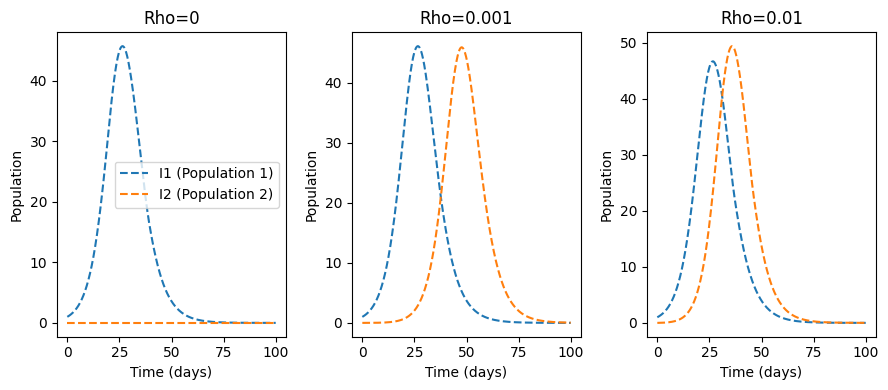

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def vary_rho(rho):
    def sir_two_populations(t, y, beta1, gamma, rho, N1, N2):
        S1, I1, R1, S2, I2, R2 = y
        
        dS1_dt = -S1 * beta1 * (I1 / N1 + rho * I2 / N1)
        dI1_dt =  S1 * beta1 * (I1 / N1 + rho * I2 / N1) - gamma * I1
        dR1_dt = gamma * I1
        
        dS2_dt = -S2 * beta1 * (I2 / N2 + rho * I1 / N2)
        dI2_dt = S2 * beta1 * (I2 / N2 + rho * I1 / N2) - gamma * I2
        dR2_dt = gamma * I2
        
        return [ dS1_dt, dI1_dt, dR1_dt
                ,dS2_dt, dI2_dt, dR2_dt]
    
    # Parameters
    beta1 = 0.7  # Infection rate
    gamma = 0.5  # Recovery rate
    N1, N2 = 1000, 1000  # Population sizes
    
    # Initial conditions
    S1_0, I1_0, R1_0 = N1 - 1, 1, 0  # Population 1
    S2_0, I2_0, R2_0 = N2 - 0, 0, 0  # Population 2
    y0 = [ S1_0, I1_0, R1_0
          ,S2_0, I2_0, R2_0]
    
    # Time span
    t_span = (0, 100)  # 100 days
    t_eval = np.linspace(*t_span, 1000)
    
    # Solve the system
    solution = solve_ivp(sir_two_populations
                         , t_span
                         , y0
                         , args   = (beta1, gamma, rho, N1, N2)
                         , t_eval = t_eval)
    return solution 
    

# Plot results
fig,axs = plt.subplots( 1,3, figsize=(9, 4))

ax = axs[0]
solution = vary_rho(0)
ax.plot(solution.t, solution.y[1], label='I1 (Population 1)', linestyle='dashed')
ax.plot(solution.t, solution.y[4], label='I2 (Population 2)', linestyle='dashed')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
ax.set_title("Rho=0")
ax.legend()


ax = axs[1]
solution = vary_rho(0.001)
ax.plot(solution.t, solution.y[1], label='I1 (Population 1)', linestyle='dashed')
ax.plot(solution.t, solution.y[4], label='I2 (Population 2)', linestyle='dashed')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
ax.set_title("Rho=0.001")


ax = axs[2]
solution = vary_rho(0.01)
ax.plot(solution.t, solution.y[1], label='I1 (Population 1)', linestyle='dashed')
ax.plot(solution.t, solution.y[4], label='I2 (Population 2)', linestyle='dashed')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
ax.set_title("Rho=0.01")

fig.set_tight_layout(True)
plt.show()

### Force of infection and Strength of interaction 

### Principles learned from this simulation 

Not surprisingly, in the "isolated" metapopulation model we observe that in population one the number of infections follows the typical SIR pattern. 
In population two, there are zero infections and no way for population one to interact with population two. 
This results in zero infections in population two over the observed time period. 

For the "minimal interaction" model, we see that infectors in population one interact with those susceptibles in population two. This results in the beginning of an outbreak later in time than the one present in population one. 


This example illustrates two principles in metapopulation models: (1) Even in a population with no infectors (zero-infector pop) an outbreak will occur. This is because infectors in the coupled population come into contact with individuals in the "zero-infector" population. (2) For populations with little or no infectors, you will observe a lag in the number of infectors compared to the population that started with infectors. 

This has public health implications---it is not enough to study a population in isolation.
We should work to identify other populations that our population under study come into contact with. 
Infections in those other populations modulate the probability of an outbreak in our population of study. 

### Example of dynamics

### Starting an epidemic in a neighboring area

### Probability of an epidemic 

### Movement and commuting example  

### Extinction and coupling

### Mathematical demonstration of the above principles 

The treatment below follows closely the work by Keeling and Rohani. 

We can also demonstrate the above principles using mathematics. 
Lets assume that we are early in the outbreak for population one---before many, if at all any, infectors come into contact with population two. 
Remember for this setting, population two has no initial infectors.

Then the change in the number of infectors for population two equals 

\begin{align}
    \frac{dI_{2}}{dt} &=  S_{2} \left[ \beta_{1} \left( \frac{I_{2}}{N_{2}} + \rho \frac{I_{1}}{N_{2}} \right) \right] - \gamma I_{2} \\ 
                       & = N_{2} \left[ \beta_{1} \left( \frac{I_{2}}{N_{2}} + \rho \frac{I_{1}}{N_{2}} \right) \right] - \gamma I_{2} \;\; \text{(Beginning of outbreak)} \\ 
                       & = \beta_{1} \left( I_{2} + \rho I_{1} \right) - \gamma I_{2} \\
                      &= \left(\beta_{1} - \gamma\right) I_{2} + \beta_{1} \rho I_{1}\\ 
                      \frac{dI_{2}}{dt} - \left(\beta_{1} - \gamma\right) I_{2}  &=  \beta_{1} \rho I_{1}
\end{align} 

If we can solve the above equation then we would arrive at a function $I_{2}(t)$ of the number of infectors in population two over time. 
This function could describe the factors influencing $I_{2}$. 
We can already understand some of the factors influencing $I_{2}$. 
We see that the number of infectors in population two depends on the: (1) the number of infectors in population one and (2) the amount of "coupling". 
This is because of the term $\beta_{1} \rho I_{1}$ on the right hand side of this differential equation. 

Is there a reasonable way to arrive at an $I_{2}(t)$? 

#### Mathematical aside (Integrating factors)

The majority of analytical solutions to differential equations fall into two categories: (1) good guesses and (2) placing our differential equation into a specific form that we know has a general solution. 
Integrating factors are of solution type (2). 

Form calculus, the product rule states that, given two functions $f(t)$ and $g(t)$,

\begin{align}
    \left[ f(t)g(t) \right]' = f'(t)g(t) + f(t)g'(t)
\end{align}


When we look at the left hand side of our differential equation, we see it looks close to the result of the product rule 

\begin{align}
    I_{2}'(t) - \left(\beta_{1} - \gamma\right) I_{2} \\ 
\end{align}

We just need a "g" function multiplied by $I_{2}'(t)$. 
Lets just add this and see where we get. 

We will suppose there exists some function $g(t)$ and multiply left and right by this function 

\begin{align}
     g(t)I_{2}'(t) - g(t)\left(\beta_{1} - \gamma\right) I_{2}  &=  g(t)\beta_{1} \rho I_{1}
\end{align}

Well what if the left hand side really was the result of $\left[I_{2}(t)g(t)\right]'$? 

Then 

\begin{align}
      \left[I_{2}(t)g(t)\right]' &=  g(t)\beta_{1} \rho I_{1} \\ 
        I_{2}(t)g(t) &= \int g(t)\beta_{1} \rho I_{1} \; dt + C \\ 
        I_{2} (t)        &= \frac{1}{g(t)} \left[ \int g(t)\beta_{1} \rho I_{1} \; dt + C \right]
\end{align}

In other words, if the left hand side of our differential equation really is $\left[I_{2}(t)g(t)\right]'$ then we can solve for $I_{2}(t)$. Well what does this imply? 

\begin{align}
\left[I_{2}(t)g(t)\right]' &= g(t)I_{2}'(t) - g(t)\left(\beta_{1} - \gamma\right) I_{2} \\
    I_{2}(t)g'(t) &=  - I_{2}(t) g(t)\left(\beta_{1} - \gamma\right) \\
    g'(t) &= -g(t)\left(\beta_{1} - \gamma\right)  \\ 
\end{align}

We know how to solve the above diffeq. This is just $g(t) = e^{ -t(\beta_{1} - \gamma) }$

Then our final solution is 

\begin{align}
     I_{2} (t)        &= \frac{1}{g(t)} \left[\int g(t)\beta_{1} \rho I_{1} \; dt + C \right] \\ 
     I_{2} (t)        &= e^{ t(\beta_{1} - \gamma)} \left[\int_{0}^{t} e^{ -t(\beta_{1} - \gamma)}\beta_{1} \rho I_{1}(t) \; dt + C \right]
\end{align}

We can solve for $C$ by setting time to zero 

\begin{align}
     I_{2} (0)        &= e^{ t(\beta_{1} - \gamma)} \left[\int_{0}^{t} e^{ -t(\beta_{1} - \gamma)}\beta_{1} \rho I_{1}(t) \; dt + C \right] \\ 
    I_{2} (0) &= C \implies  \\ 
     I_{2} (t)        &= e^{ t(\beta_{1} - \gamma)} \left[\int_{0}^{t} e^{ -t(\beta_{1} - \gamma)}\beta_{1} \rho I_{1}(t) \; dt + I_{2}(0) \right] \\
\end{align}

We see, a few key principles from this analysis. 
The growth of growth of infectors in population two depends on the number of infectors in population two **and** the number of infectors in population one. 
We see also that the rate of growth of infectors in population two is exponential, depending on the coupling between population one and two; and on the transmission and infectious periods.
When $\rho=0$ our growth reduces to the simple "one population SIR". 

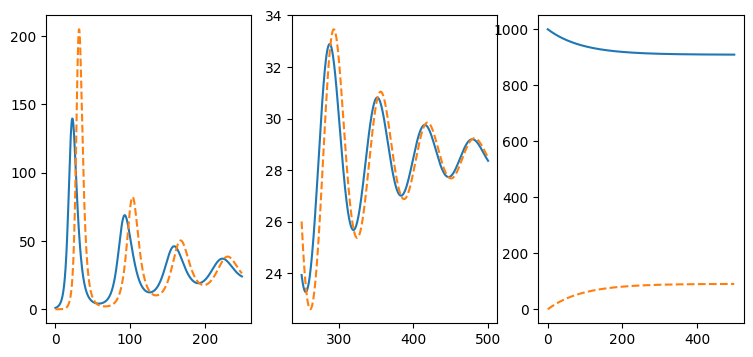

In [82]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def vary_rho(rho):
    def sir_two_populations(t, y, beta, gamma, come_home, go_away,mu):
        Sxx,Sxy,Syx,Syy,Ixx,Ixy,Iyx,Iyy,Nxx,Nxy,Nyx,Nyy = y
        
        dSxx_dt = mu*Nxx-beta * Sxx * (Ixx + Iyx)/( Nxx + Nyx ) + come_home*Sxy - go_away*Sxx
        dSxy_dt = mu*Nxy-beta * Sxy * (Iyy + Ixy)/( Nyy + Nxy ) - come_home*Sxy + go_away*Sxx
        
        dSyx_dt = mu*Nyx-beta * Syx * (Ixx + Iyx)/( Nxx + Nyx ) - come_home*Syx + go_away*Syy
        dSyy_dt = mu*Nyy-beta * Syy * (Iyy + Ixy)/( Nyy + Nxy ) + come_home*Syx - go_away*Syy

        dIxx_dt = beta * Sxx * (Ixx + Iyx)/( Nxx + Nyx ) + come_home*Ixy - go_away*Ixx - gamma*Ixx
        dIxy_dt = beta * Sxy * (Iyy + Ixy)/( Nyy + Nxy ) - come_home*Ixy + go_away*Ixx - gamma*Ixy
        
        dIyx_dt = beta * Syx * (Ixx + Iyx)/( Nxx + Nyx ) - come_home*Iyx + go_away*Iyy - gamma*Iyx
        dIyy_dt = beta * Syy * (Iyy + Ixy)/( Nyy + Nxy ) + come_home*Iyx - go_away*Iyy - gamma*Iyy

        dNxx_dt    = come_home * Nxy - go_away * Nxx
        dNyy_dt    = come_home * Nyx - go_away * Nyy

        dNxy_dt    = -come_home * Nxy + go_away * Nxx
        dNyx_dt    = -come_home * Nyx + go_away * Nyy
        
        return [ dSxx_dt, dSxy_dt, dSyx_dt, dSyy_dt
               , dIxx_dt, dIxy_dt, dIyx_dt, dIyy_dt
               , dNxx_dt, dNxy_dt, dNyx_dt, dNyy_dt] 
    
    # Parameters
    beta      = 0.7  # Infection rate
    gamma     = 0.5  # Recovery rate
    mu        = 1./70
    
    come_home = 0.01
    go_away   = 0.001

    Nxx, Nyy = 1000, 1000  # Population sizes
    Nxy, Nyx = 0, 0 # Population sizes

    # Initial conditions
    Sxx,Sxy,Syx,Syy = 999,0,0,1000
    Ixx,Ixy,Iyx,Iyy = 1,0,0,0

    y0 = [Sxx,Sxy,Syx,Syy,Ixx,Ixy,Iyx,Iyy,Nxx,Nxy,Nyx,Nyy]
    
    # Time span
    t_span = (0, 500)  # 100 days
    t_eval = np.linspace(*t_span, (t_span[-1]-t_span[0])*2 )
    
    # Solve the system
    solution = solve_ivp(sir_two_populations
                         , t_span
                         , y0
                         , args   = (beta, gamma, come_home, go_away,mu)
                         , t_eval = t_eval)
    return solution 
    

# Plot results
fig,axs = plt.subplots( 1,3, figsize=(9, 4))

solution = vary_rho(0)

ax = axs[0]
Ix = solution.y[4] + solution.y[5]
Iy = solution.y[6] + solution.y[7]

ax.plot(solution.t[:500:], Ix[:500] , label='I1 (Population 1)')
ax.plot(solution.t[:500], Iy[:500],  label='I2 (Population 2)', linestyle='dashed')

ax = axs[1]
ax.plot(solution.t[-500:], Ix[-500:] , label='I1 (Population 1)')
ax.plot(solution.t[-500:], Iy[-500:],  label='I2 (Population 2)', linestyle='dashed')


ax = axs[2]

Nxx = solution.y[-4]
Nxy = solution.y[-3]
Nyx = solution.y[-2]
Nyy = solution.y[-1]

ax.plot(solution.t, Nxx , label='I1 (Population 1)')
ax.plot(solution.t, Nxy,  label='I2 (Population 2)', linestyle='dashed')